## PBMC

In [ ]:
import numpy as np
import pandas as pd
from divik._matlab_legacy import find_thresholds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv", index_col=0)

In [3]:
data.shape

(33694, 3222)

In [4]:
data.columns[data.isna().any()].tolist()

[]

In [5]:
x = np.count_nonzero(data, axis=1)
x = np.log(x+np.full(x.shape,1))

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

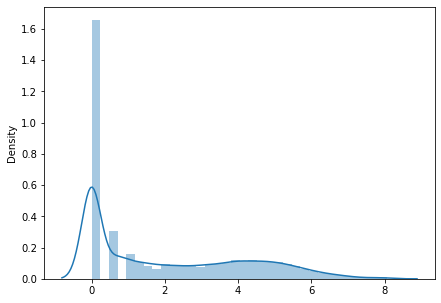

In [6]:
plt.figure(figsize=(7,5))
sns.distplot(x)

In [43]:
find_thresholds(x, max_components=10)

array([4.99209389e-03, 7.02826950e-01, 1.11058349e+00, 1.39961916e+00,
       1.62376517e+00, 1.80585203e+00, 2.38739252e+00, 3.27126684e+00,
       7.89715933e+00])

In [47]:
thr = 1.6

In [49]:
is_in_filtered = x > thr

In [52]:
filtered = data[is_in_filtered]

In [53]:
filtered.shape

(15821, 3222)

In [59]:
filtered = pd.DataFrame(filtered)
filtered.to_csv("filtered_pbmc.csv")

## Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
datatype = "raw_counts"
# datatype = "log2"

### Liver & breast cancer

In [189]:
folder = "Liver"
# folder = "BreastCancer"

In [190]:
genes = pd.read_csv("data/"+folder+"/genes.csv", usecols=["genes", "external_gene_name"], index_col="genes")
genes.head()

,external_gene_name
genes,
ENSG00000000003,TSPAN6
ENSG00000000005,TNMD
ENSG00000000419,DPM1
ENSG00000000457,SCYL3
ENSG00000000460,C1orf112


In [191]:
genes.isnull().values.sum()

62

In [192]:
genes.dropna(inplace=True)

In [193]:
v = genes[genes.duplicated('external_gene_name', keep=False)].index.tolist()

In [194]:
genes[genes.duplicated('external_gene_name', keep=False)]

,external_gene_name
genes,
ENSG00000188626,GOLGA8M
ENSG00000278186,GOLGA8M


In [ ]:
cells = pd.read_csv("data/"+folder+"/"+ datatype+"_data.csv", index_col=0)
cells.head()

In [196]:
pd.unique(genes[genes.duplicated('external_gene_name',
keep=False)].external_gene_name)

array(['GOLGA8M'], dtype=object)

In [197]:
pd.unique(genes[genes.duplicated('external_gene_name',
keep=False)]["external_gene_name"])

array(['GOLGA8M'], dtype=object)

In [158]:
duplicates = pd.unique(genes[genes.duplicated('external_gene_name',
keep=False)].external_gene_name)
duplicated_rows = genes[genes.duplicated('external_gene_name', keep=False)]
for name in duplicates:
    id = genes[genes["external_gene_name"]==name].index
    to_stay = cells.loc[id].var(axis=1).idxmax()
    duplicated_rows = duplicated_rows.drop(index=to_stay)
genes = genes.drop(index=duplicated_rows.index)

In [159]:
genes.shape

(15587, 1)

In [160]:
new_cells = pd.concat([cells, genes], join="inner", axis=1)
new_cells.shape

(15587, 14853)

In [161]:
new_cells = new_cells.set_index("external_gene_name")
new_cells.index.name = None
new_cells.head()

,SAMEA11294524-AAACCTGAGTCTCCTC,SAMEA11294524-AAACCTGCAATGTAAG,SAMEA11294524-AAACCTGCACCGATAT,SAMEA11294524-AAACCTGCAGTCAGAG,SAMEA11294524-AAACCTGGTATCAGTC,SAMEA11294524-AAACCTGGTCAATGTC,SAMEA11294524-AAACCTGGTTCCACTC,SAMEA11294524-AAACCTGTCCGTACAA,SAMEA11294524-AAACCTGTCGGACAAG,SAMEA11294524-AAACCTGTCTTTAGGG,...,SAMEA11294531-TTTGCGCTCCAGAGGA,SAMEA11294531-TTTGCGCTCTGTCCGT,SAMEA11294531-TTTGGTTAGCCCAGCT,SAMEA11294531-TTTGGTTAGTCTCAAC,SAMEA11294531-TTTGGTTCAAGGTTTC,SAMEA11294531-TTTGGTTCAATAACGA,SAMEA11294531-TTTGGTTCACGGTTTA,SAMEA11294531-TTTGGTTTCCAAATGC,SAMEA11294531-TTTGTCAAGATCTGCT,SAMEA11294531-TTTGTCAAGCTAGTCT
TSPAN6,1.053026,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
TNMD,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
DPM1,0.000000,0.491265,1.014371,1.237905,0.0,0.636558,0.0,0.0,1.986645,0.0,...,0.0,0.0,0.0,0.0,0.0,0.331461,0.0,0.0,1.071214,0.0
SCYL3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
C1orf112,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [162]:
new_cells.to_csv("data/"+folder+"/"+ datatype+"_data.csv")

### Others

In [93]:
# folder = "Pancreas"
# folder = "BM"
# folder = "COVID"

In [ ]:
cells = pd.read_csv("data/"+folder+"/"+ datatype+"_data.csv", index_col=0)
cells.head()

In [174]:
cells.shape

(15587, 14852)

In [175]:
cells.dropna(inplace=True)
print(cells.shape)

(15587, 14852)


In [176]:
vars = np.var(cells, axis=1)

In [177]:
vars = vars[vars != 0]

In [178]:
vars.shape

(15573,)

In [182]:
cells = cells.loc[vars.sort_values()[int(0.75 * vars.shape[0]) :].index]

In [183]:
cells.shape

(3894, 14852)

In [186]:
cells.head()

,SAMEA11294524-AAACCTGAGTCTCCTC,SAMEA11294524-AAACCTGCAATGTAAG,SAMEA11294524-AAACCTGCACCGATAT,SAMEA11294524-AAACCTGCAGTCAGAG,SAMEA11294524-AAACCTGGTATCAGTC,SAMEA11294524-AAACCTGGTCAATGTC,SAMEA11294524-AAACCTGGTTCCACTC,SAMEA11294524-AAACCTGTCCGTACAA,SAMEA11294524-AAACCTGTCGGACAAG,SAMEA11294524-AAACCTGTCTTTAGGG,...,SAMEA11294531-TTTGCGCTCCAGAGGA,SAMEA11294531-TTTGCGCTCTGTCCGT,SAMEA11294531-TTTGGTTAGCCCAGCT,SAMEA11294531-TTTGGTTAGTCTCAAC,SAMEA11294531-TTTGGTTCAAGGTTTC,SAMEA11294531-TTTGGTTCAATAACGA,SAMEA11294531-TTTGGTTCACGGTTTA,SAMEA11294531-TTTGGTTTCCAAATGC,SAMEA11294531-TTTGTCAAGATCTGCT,SAMEA11294531-TTTGTCAAGCTAGTCT
CD40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NFAT5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
CNR2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
YPEL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [187]:
cells.to_csv("data/" + folder + "/" + datatype + "_filtered_data.csv")